## Constructing co-expression graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_Loading expression data for selected mice._

In [2]:
expression_data_all_features = pd.read_pickle("processed_data/expression_standardized_cleaned.pkl")

In [3]:
expression_data_all_features

strain,Nmt1_10338077_Muscle_CD,Psmb5_10338095_Muscle_CD,Hdac5_10338098_Muscle_CD,Dlg1_10338109_Muscle_CD,Wars_10338116_Muscle_CD,Psph_10338122_Muscle_CD,Copa_10338123_Muscle_CD,Tbl3_10338144_Muscle_CD,Hb1bp3_10338180_Muscle_CD,Aup1_10338221_Muscle_CD,...,AFFX-r2-P1-cre-3_AFFX-r2-P1-cre-5_at_Eye,AFFX-ThrX-3_AFFX-ThrX-3_at_Eye,AFFX-ThrX-5_AFFX-ThrX-5_at_Eye,AFFX-ThrX-M_AFFX-ThrX-M_at_Eye,Tfrc_AFFX-TransRecMur-X57349_3_at_Eye,Tfrc_AFFX-TransRecMur-X57349_5_at_Eye,Tfrc_AFFX-TransRecMur-X57349_M_at_Eye,AFFX-TrpnX-3_AFFX-TrpnX-3_at_Eye,AFFX-TrpnX-5_AFFX-TrpnX-5_at_Eye,AFFX-TrpnX-M_AFFX-TrpnX-M_at_Eye
B6D2F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.945871,-0.383660,-1.764515,-1.513057,0.618771,1.036264,1.008312,-0.810138,-0.336536,-0.813993
BXD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414755,0.599324,0.185117,1.277075,-0.501507,-0.566462,-0.427261,-0.273595,-2.101328,1.004035
BXD100,-0.725161,0.007720,0.376058,0.545516,-1.104466,-0.273818,-0.901318,-0.509151,-0.924874,0.986363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD101,-1.317918,1.462562,0.845329,0.515211,-1.058281,-0.056781,-0.942842,-0.953912,0.496976,0.299762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BXD98,2.220295,-1.073020,0.193564,0.252363,1.052343,-1.433933,-0.207268,1.668022,0.450924,-0.547979,...,-0.644823,-0.666892,0.167393,-0.138813,-0.566410,-0.740733,-0.645876,-0.672170,-1.854257,0.509659
BXD99,-1.305697,0.207241,1.453644,0.255455,-0.748846,0.607248,-0.625478,1.101311,-1.224210,-0.611035,...,-0.056785,0.899217,-0.612460,-0.721825,-0.826021,-0.757874,0.082841,-0.610851,1.463552,1.673835
C57BL.6J,-1.929009,-0.557591,-0.353919,-0.014195,0.050143,-1.273739,-0.064899,-0.132540,-0.677345,2.506693,...,1.535355,-0.017124,-1.285969,-2.491685,0.734467,0.979126,0.822489,-1.086075,-0.830678,-0.112298
D2B6F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.563092,2.631934,0.185117,-2.366754,0.130589,0.744860,0.724112,-0.518872,0.192902,-1.196735


_As we can observe we have 86 strains (mice) and 1,201,231 expression features._

_Loading the relevant features for our task._

In [4]:
selected_features_df = pd.read_pickle("processed_data/selected_features.pkl")

In [5]:
selected_features = list(selected_features_df.columns)

In [6]:
print('The total number of selected features is {f}'.format(f = len(selected_features)))

The total number of selected features is 54027


_We now select the relevant features for all the available strains._

In [7]:
expression_data = expression_data_all_features[selected_features].T

In [8]:
expression_data.index.name = 'snp'

In [9]:
expression_data

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD9,BXD90,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
snp,,,,,,,,,,,,,,,,,,,,,
Nmt1_10338077_Muscle_CD,NaN,NaN,-0.725161,-1.317918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.792381,NaN,NaN,-1.360695,2.220295,-1.305697,-1.929009,NaN,-0.156847
MJ-4000-125_896_ILM104120471_Bone_Femur,NaN,-0.198943,NaN,NaN,NaN,-0.163706,1.527677,-0.351637,0.376597,-0.386874,...,-0.187197,NaN,NaN,NaN,NaN,NaN,NaN,-1.443989,NaN,1.586406
Mgp_10548879_Amygdala_Female,0.448772,1.193585,NaN,0.870287,2.797799,1.009428,-0.459737,NaN,0.702500,NaN,...,NaN,-0.001390,NaN,NaN,-1.036762,NaN,0.035442,0.317816,-0.995838,-1.237289
Gna12_1439206_at_Eye,1.997524,-0.403447,NaN,NaN,NaN,-0.651824,-0.557204,0.057823,-0.060451,0.105133,...,0.956709,1.429807,NaN,NaN,NaN,-2.875384,0.400819,-0.131416,1.796458,1.855595
C230029F24Rik_ILM101240504_Bone_Femur,NaN,-1.295179,NaN,NaN,NaN,-0.133060,-0.990361,-1.209449,0.428948,2.267382,...,-0.161637,NaN,NaN,NaN,NaN,NaN,NaN,0.600408,NaN,0.552781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc43a2_1439965_at_Nucleus_accumbens,NaN,-0.876296,NaN,NaN,NaN,0.711479,-0.797622,NaN,0.332415,0.203677,...,-1.055099,0.647110,NaN,NaN,NaN,0.797304,NaN,-0.065243,NaN,1.014729
MJ-2000-100_1260_ILM105550215_Bone_Femur,NaN,-1.728374,NaN,NaN,NaN,0.242024,-0.113743,1.747189,0.816723,-0.455826,...,-0.127426,NaN,NaN,NaN,NaN,NaN,NaN,0.789357,NaN,0.529373
9627219_44-S_ILM101940088_Bone_Femur,NaN,0.755028,NaN,NaN,NaN,0.532840,-0.002057,-0.158412,-0.240704,0.903154,...,-1.195290,NaN,NaN,NaN,NaN,NaN,NaN,-1.030706,NaN,-0.314767


_In order to build our co-expression graph, given two SNPs X and Y:_
- _we first obtain the vectors corresponding to the expression for all strains for those SNPS._
- _we then compute the number of common strains for these two SNPs X and Y, call it **n**._
- _we then compute the euclidian distance **e** between the non NaN values of X and Y._
- _we obtain the distance **d** between X and Y by computing d = e / n._

_We will first visualize the distribution of number of common mice measurement per pair of SNPs. With this distribution we can then set the distance to infinity between X and Y if they don't share at least n common measurements._

In [10]:
samples = expression_data.iloc[:2000]
samples.index.name = 'snp'
samples

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD9,BXD90,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
snp,,,,,,,,,,,,,,,,,,,,,
Nmt1_10338077_Muscle_CD,NaN,NaN,-0.725161,-1.317918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.792381,NaN,NaN,-1.360695,2.220295,-1.305697,-1.929009,NaN,-0.156847
MJ-4000-125_896_ILM104120471_Bone_Femur,NaN,-0.198943,NaN,NaN,NaN,-0.163706,1.527677,-0.351637,0.376597,-0.386874,...,-0.187197,NaN,NaN,NaN,NaN,NaN,NaN,-1.443989,NaN,1.586406
Mgp_10548879_Amygdala_Female,0.448772,1.193585,NaN,0.870287,2.797799,1.009428,-0.459737,NaN,0.702500,NaN,...,NaN,-0.001390,NaN,NaN,-1.036762,NaN,0.035442,0.317816,-0.995838,-1.237289
Gna12_1439206_at_Eye,1.997524,-0.403447,NaN,NaN,NaN,-0.651824,-0.557204,0.057823,-0.060451,0.105133,...,0.956709,1.429807,NaN,NaN,NaN,-2.875384,0.400819,-0.131416,1.796458,1.855595
C230029F24Rik_ILM101240504_Bone_Femur,NaN,-1.295179,NaN,NaN,NaN,-0.133060,-0.990361,-1.209449,0.428948,2.267382,...,-0.161637,NaN,NaN,NaN,NaN,NaN,NaN,0.600408,NaN,0.552781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530009G21Rik_10369171_Gastrointestinal,0.322647,1.816162,-1.076042,-0.400404,2.361413,-0.222605,-0.815269,NaN,-1.407934,NaN,...,NaN,-0.892316,NaN,NaN,0.565639,NaN,0.464886,0.008534,-1.496834,-0.216678
Gm4981_10369228_Gastrointestinal,-0.834167,1.138682,-1.112687,0.071023,-1.634912,-0.242312,0.326333,NaN,0.825347,NaN,...,NaN,2.055477,NaN,NaN,0.233493,NaN,0.935595,-0.416387,-0.810957,1.434610
Anapc4_10521863_Liver_CD,NaN,NaN,-0.136104,-0.678264,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.030888,NaN,NaN,-0.687080,1.415442,-0.122881,0.066655,NaN,-1.092597


In [147]:
def compute_common_mice_per_snp_pair(expression_data):
    
    rows = []
    
    for index_i, row_i in expression_data.iterrows():
        
        new_row = {}
    
        for index_j, row_j in expression_data.iterrows():

                u = row_i.values
                v = row_j.values
                u_valid_indexes = np.argwhere(~np.isnan(u))
                v_valid_indexes = np.argwhere(~np.isnan(v))
                valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
                n = len(valid_indexes)
                
                new_row[index_j] = n
                
        rows.append(new_row)
    
    return pd.DataFrame(rows, index = expression_data.index)

In [148]:
count = compute_common_mice_per_snp_pair(samples)
count

,Nmt1_10338077_Muscle_CD,MJ-4000-125_896_ILM104120471_Bone_Femur,Mgp_10548879_Amygdala_Female,Gna12_1439206_at_Eye,C230029F24Rik_ILM101240504_Bone_Femur,Golga7_10338639_Muscle_CD,Slco1a6_10549025_Amygdala_Female,BC035947_ILM2120373_Bone_Femur,Nlrp12_ILM104570136_Bone_Femur,MJ-3000-122_1862_ILM102260136_Bone_Femur,...,Ppfibp1_1445577_at_Eye,Slc23a2_1445589_at_Eye,Pla2g16_1445597_s_at_Eye,E230011A21Rik_1445599_at_Eye,Oas1b_1445601_at_Eye,9530009G21Rik_10369171_Gastrointestinal,Gm4981_10369228_Gastrointestinal,Anapc4_10521863_Liver_CD,Sptlc1_10409294_Muscle_CD,1110067D22Rik_1445622_at_Eye
snp,,,,,,,,,,,,,,,,,,,,,
Nmt1_10338077_Muscle_CD,42,2,34,35,2,42,34,2,2,2,...,35,35,35,35,35,34,34,41,42,35
MJ-4000-125_896_ILM104120471_Bone_Femur,2,32,17,31,32,2,17,32,32,32,...,31,31,31,31,31,15,15,2,2,31
Mgp_10548879_Amygdala_Female,34,17,53,48,17,34,53,17,17,17,...,48,48,48,48,48,48,48,33,34,48
Gna12_1439206_at_Eye,35,31,48,72,31,35,48,31,31,31,...,72,72,72,72,72,43,43,34,35,72
C230029F24Rik_ILM101240504_Bone_Femur,2,32,17,31,32,2,17,32,32,32,...,31,31,31,31,31,15,15,2,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530009G21Rik_10369171_Gastrointestinal,34,15,48,43,15,34,48,15,15,15,...,43,43,43,43,43,50,50,33,34,43
Gm4981_10369228_Gastrointestinal,34,15,48,43,15,34,48,15,15,15,...,43,43,43,43,43,50,50,33,34,43
Anapc4_10521863_Liver_CD,41,2,33,34,2,41,33,2,2,2,...,34,34,34,34,34,33,33,41,41,34


_We then apply a mask in order to count each pair once._

In [149]:
mask = np.zeros_like(count.values, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

In [150]:
common_mice_per_pair = count.values[mask]

In [151]:
common_mice_per_pair

array([42,  2, 32, ..., 34, 35, 72])

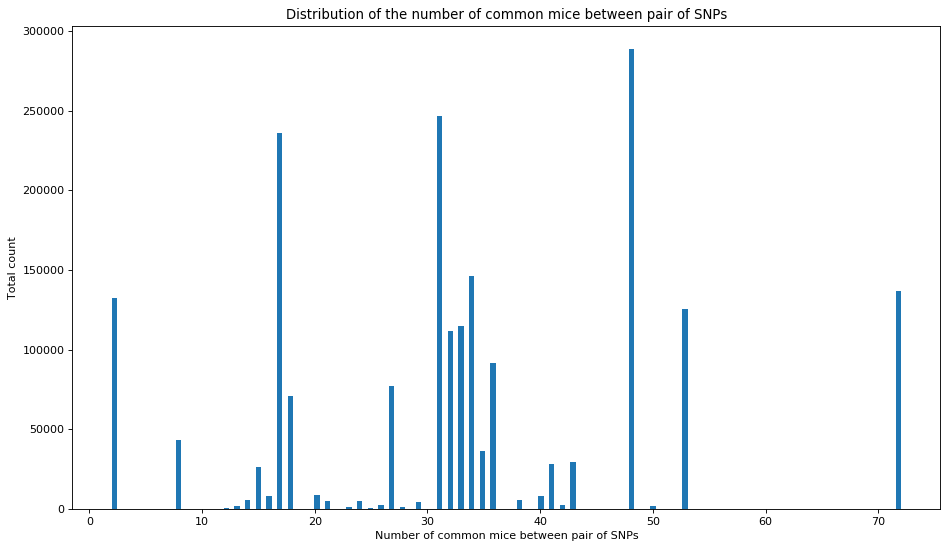

In [153]:
plt.figure(figsize = (14, 8), dpi = 80)
plt.hist(common_mice_per_pair, bins='auto')
plt.title('Distribution of the number of common mice between pair of SNPs')
plt.xlabel('Number of common mice between pair of SNPs')
plt.ylabel('Total count')
plt.show()

In [27]:
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import pairwise_distances, pairwise

_Define the distance function that we are using to build the graph._

In [30]:
def distance(u, v):
    # Obtain common indexes that are non NaN for both u and v
    u_valid_indexes = np.argwhere(~np.isnan(u))
    v_valid_indexes = np.argwhere(~np.isnan(v))
    valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
    
    
    
    # Obtain valid common vectors and length of these vectors
    u_valid = u[valid_indexes]
    v_valid = v[valid_indexes]
    n = len(valid_indexes)
    
    distance = np.linalg.norm(u_valid-v_valid)
    return distance / n 

In [79]:
# distances = pd.DataFrame(
#     squareform(pairwise_distances(samples.as_matrix().astype(np.float),
#                                   metric = distance,
#                                   n_jobs = -1,
#                                   force_all_finite = False)),
#     columns = samples.index,
#     index = samples.index
# )
distances = pd.DataFrame(
    squareform(pdist(samples,
                    distance)),
    columns = samples.index,
    index = samples.index
)

In [80]:
distances

snp,Nmt1_10338077_Muscle_CD,MJ-4000-125_896_ILM104120471_Bone_Femur,Mgp_10548879_Amygdala_Female,Gna12_1439206_at_Eye,C230029F24Rik_ILM101240504_Bone_Femur,Golga7_10338639_Muscle_CD,Slco1a6_10549025_Amygdala_Female,BC035947_ILM2120373_Bone_Femur,Nlrp12_ILM104570136_Bone_Femur,MJ-3000-122_1862_ILM102260136_Bone_Femur,...,Ppfibp1_1445577_at_Eye,Slc23a2_1445589_at_Eye,Pla2g16_1445597_s_at_Eye,E230011A21Rik_1445599_at_Eye,Oas1b_1445601_at_Eye,9530009G21Rik_10369171_Gastrointestinal,Gm4981_10369228_Gastrointestinal,Anapc4_10521863_Liver_CD,Sptlc1_10409294_Muscle_CD,1110067D22Rik_1445622_at_Eye
snp,,,,,,,,,,,,,,,,,,,,,
Nmt1_10338077_Muscle_CD,0.000000,0.904734,0.228011,0.287058,1.313537,0.171662,0.218657,0.451094,1.291807,0.957133,...,0.228831,0.190639,0.272848,0.190989,0.216352,0.246205,0.234701,0.185968,0.174255,0.231128
MJ-4000-125_896_ILM104120471_Bone_Femur,0.904734,0.000000,0.410771,0.220498,0.256229,0.809145,0.265232,0.250319,0.253145,0.263361,...,0.252198,0.267305,0.230429,0.220982,0.229276,0.383867,0.276270,1.537782,0.714227,0.206944
Mgp_10548879_Amygdala_Female,0.228011,0.410771,0.000000,0.215914,0.355352,0.237925,0.197077,0.290286,0.251240,0.344149,...,0.188567,0.193534,0.211828,0.176425,0.223720,0.170345,0.219491,0.243127,0.253652,0.188937
Gna12_1439206_at_Eye,0.287058,0.220498,0.215914,0.000000,0.224161,0.250106,0.216370,0.242952,0.214328,0.210284,...,0.146449,0.180447,0.155770,0.192203,0.143883,0.200309,0.202104,0.297448,0.278923,0.153742
C230029F24Rik_ILM101240504_Bone_Femur,1.313537,0.256229,0.355352,0.224161,0.000000,0.367612,0.292845,0.269093,0.223853,0.228982,...,0.239571,0.273470,0.184322,0.223314,0.266169,0.345755,0.307560,0.864893,0.832050,0.245499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530009G21Rik_10369171_Gastrointestinal,0.246205,0.383867,0.170345,0.200309,0.345755,0.249985,0.220787,0.266538,0.384450,0.298395,...,0.225272,0.191383,0.206115,0.179215,0.186880,0.000000,0.222473,0.236870,0.237355,0.209531
Gm4981_10369228_Gastrointestinal,0.234701,0.276270,0.219491,0.202104,0.307560,0.233820,0.183509,0.293950,0.286765,0.314073,...,0.190733,0.199536,0.193448,0.190810,0.209783,0.222473,0.000000,0.255268,0.245889,0.206158
Anapc4_10521863_Liver_CD,0.185968,1.537782,0.243127,0.297448,0.864893,0.163409,0.280438,1.241445,0.490031,0.857779,...,0.280018,0.216861,0.276362,0.229708,0.258817,0.236870,0.255268,0.000000,0.196114,0.270678


In [81]:
distances_matrix = distances.values
print('Matrix containing distances has shape {s}'.format(s = distances_matrix.shape))
distances_matrix

Matrix containing distances has shape (2000, 2000)


array([[0.        , 0.90473373, 0.22801098, ..., 0.18596843, 0.17425471,
        0.23112792],
       [0.90473373, 0.        , 0.4107706 , ..., 1.53778242, 0.71422693,
        0.20694389],
       [0.22801098, 0.4107706 , 0.        , ..., 0.24312682, 0.25365181,
        0.18893726],
       ...,
       [0.18596843, 1.53778242, 0.24312682, ..., 0.        , 0.19611417,
        0.27067813],
       [0.17425471, 0.71422693, 0.25365181, ..., 0.19611417, 0.        ,
        0.271426  ],
       [0.23112792, 0.20694389, 0.18893726, ..., 0.27067813, 0.271426  ,
        0.        ]])

In [82]:
def epsilon_similarity_graph(distances: np.ndarray, sigma=1, epsilon=0):
    """ distances (n x n): matrix containing the distance between all our data points.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    W = np.exp(- distances / (2 * sigma ** 2)) # Apply the kernel to the squared distances
    W[W<epsilon] = 0 # Cut off the values below epsilon
    np.fill_diagonal(W, 0) # Remove the connections on the diagonal
    return W

In [83]:
adjacency = epsilon_similarity_graph(distances_matrix)

In [84]:
print(adjacency)

[[0.         0.63612076 0.89225306 ... 0.91120788 0.91656036 0.89086359]
 [0.63612076 0.         0.81433349 ... 0.46352674 0.6996931  0.90170132]
 [0.89225306 0.81433349 0.         ... 0.8855349  0.88088702 0.90985627]
 ...
 [0.91120788 0.46352674 0.8855349  ... 0.         0.90659715 0.87341972]
 [0.91656036 0.6996931  0.88088702 ... 0.90659715 0.         0.87309318]
 [0.89086359 0.90170132 0.90985627 ... 0.87341972 0.87309318 0.        ]]
